<a href="https://colab.research.google.com/github/AtheeshV/work/blob/main/digit_image_using_neural_network(16Jan2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Opimizer SGD, RMSprop, etc

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [ ]:
batch_size =128
num_classes = 10 #Categories such as 0,1,2,...,9
epochs = 2
#the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) #from 60000 images, 10000 images we take in (28 height * 28 Width = 784) each batch
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalise to 0 & 1 range
x_train /= 255
x_test /=255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


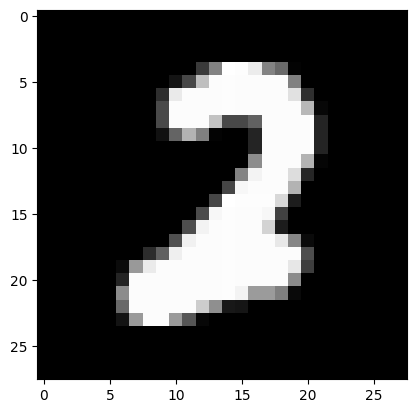

In [ ]:
print("Label:", y_test[199:200]) #199th image is tested
plt.imshow(x_test[199:200].reshape(28,28), cmap = 'gray')
plt.show()

In [ ]:
first_layer_size = 32  #While writing the assignment use twi models based on 32 and 64 neuron and conclude which model is better
#2 activation layer
#3. 3 hidden layers
model = Sequential()
model.add(Dense(first_layer_size, activation= 'sigmoid', input_shape=(784,))) #28*28
model.add(Dense(32, activation= 'sigmoid')) #we are making 2 layers of 32 neurons each i.e. 64 neurons(incld down)
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax')) #Output having 10 neurons

model.summary()

#parameter, input layer, how many hidden layers used

#28*28*32+32(weight +bias) = 25120
#hidden layers are 2 so 32*32+32(weight + bias)
#32*10+10=330

#Assignment
#Difference between this model and other
#based on neuron, hidden layer, output


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape of First Layer
Visualisation of First Layer


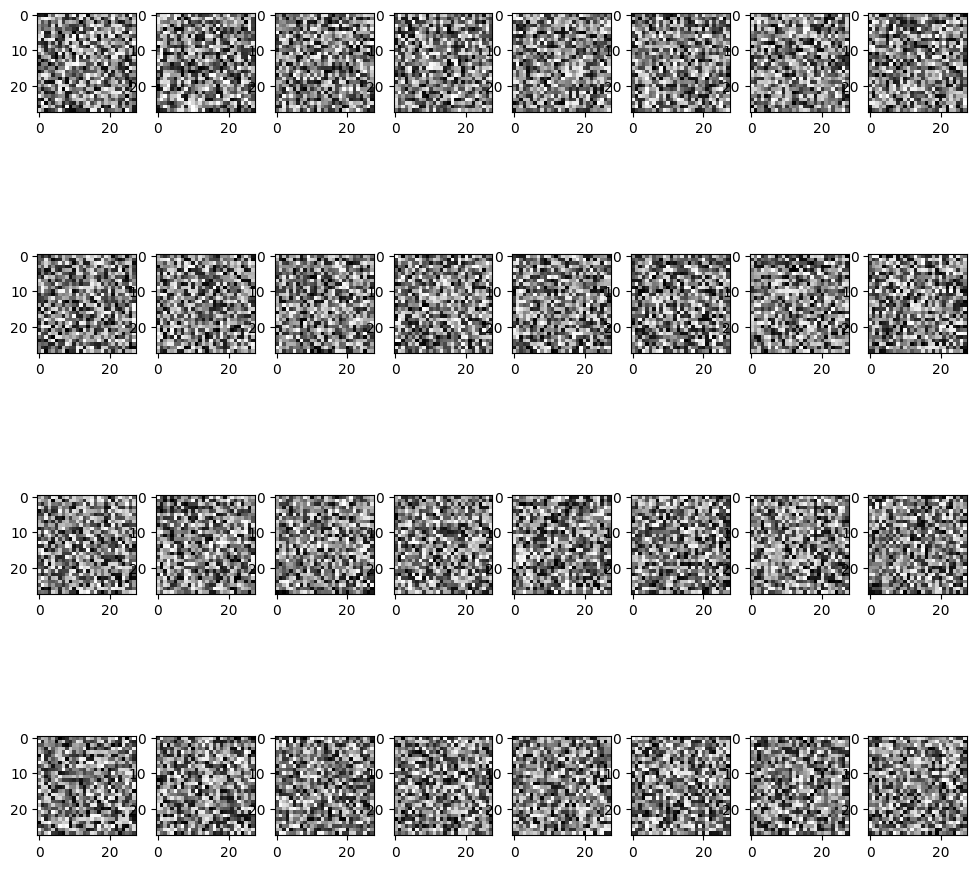

In [ ]:
w =[]
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print('Shape of First Layer')
print('Visualisation of First Layer')
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns,i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

#Every neuron looks same because we haven't given training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=4, #previously it was epochs= epochs and then we got accuracy of 87% in it
                    verbose=1)

Epoch 1/4
469/469 [==============================] - 2s 5ms/step - loss: 0.4324 - accuracy: 0.8897
Epoch 2/4
469/469 [==============================] - 2s 5ms/step - loss: 0.3181 - accuracy: 0.9146
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.2591 - accuracy: 0.9294
Epoch 4/4
469/469 [==============================] - 1s 3ms/step - loss: 0.2210 - accuracy: 0.9385


In [ ]:
#Write the testing input and output variables
#previously it was epochs= epochs in previous step and then we got accuracy of 87% in it
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.21718385815620422
Test accuracy: 0.9380000233650208


Shape of First Layer
Visualisation of First Layer


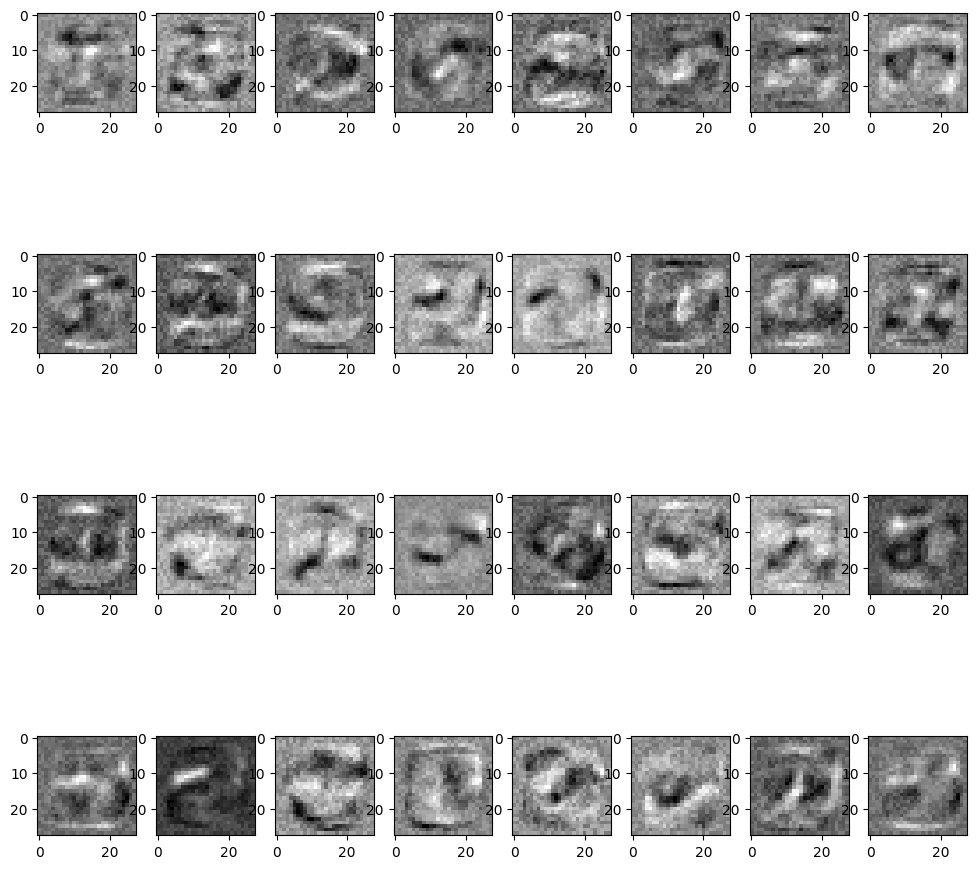

In [ ]:
w =[]
for layer in model.layers:
  weights = layer.get_weights()
  w.append(weights)
layer1 = np.array(w[0][0])
print('Shape of First Layer')
print('Visualisation of First Layer')
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns,i)
  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

#We have done the same code previously

In [ ]:
prediction = model.predict(x_test[199:200]) #199th image is tested
prediction = prediction[0]
print('Prediction\n', prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 185ms/step
Prediction
 [3.7354953e-06 1.8350290e-02 8.9931655e-01 7.5197741e-02 3.9740655e-04
 7.1432220e-04 3.0733267e-04 1.9497704e-03 3.6367946e-03 1.2611283e-04]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


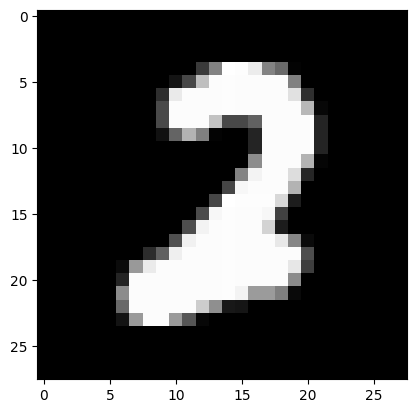

In [ ]:
plt.imshow(x_test[199:200].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
from google.colab import files
files.upload()


Saving digit.jpg to digit (1).jpg


{'digit (1).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x05\x86\x03\x84\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\

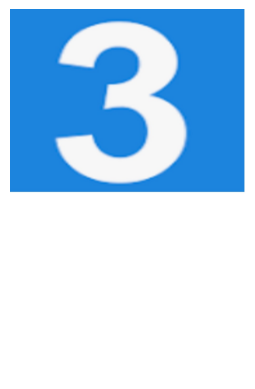

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)) #Convert BGR to RGB
plt.axis('off') #Turn off axis labels and ticks
plt.show()

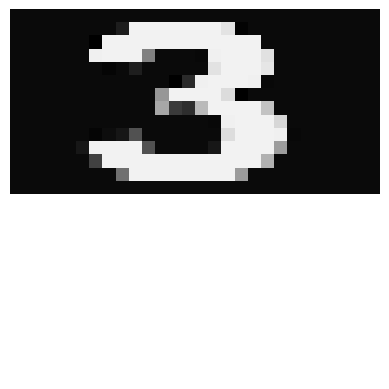

In [33]:
image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28,28))
#Show Image
plt.imshow(image_resized, cmap='gray'),plt.axis('off')
plt.show()

In [34]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n', prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n', thresholded[0])
print('\nPredicted Digit:\n', np.where(thresholded ==1)[1][0])

1/1 [==============================] - 0s 371ms/step
Prediction Score:
 [3.5928429e-06 5.0476198e-03 9.0591498e-02 8.9087081e-01 2.8761731e-05
 2.3887102e-03 4.4448632e-05 4.6350868e-04 1.0468621e-02 9.2434340e-05]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [35]:
model_json = model.to_json()
# Write the file name of the model
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# Write the file name of the weights
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [36]:
#load json and create model

# Write the file name of the model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
# Write the file name of the weights
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [37]:

loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 4s 7ms/step - loss: 0.1938 - accuracy: 0.9459
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.1743 - accuracy: 0.9509
Test loss: 0.1835058629512787
Test accuracy: 0.9470999836921692
